Алгоритм k ближайших соседей.
Выдержка из конспекта на EDU:

Рассмотрим один из самых простых алгоритмов для задачи классификации KNN - k ближайших соседей. Пусть перед нами стоит задача бинарной классификации — 0 или 1. Рассмотрим ситуацию, когда все признаки — вещественные числа. В дальнейшем, при изучении курса вы сумеете переводить номинальные и порядковые признаки в числа. Пусть у нас имеется обучающая выборка $X_{train} = \{x_1, ..., x_N \}$, где каждый $x_i$ --- вектор из $m$ признаков. Для каждого объекта из обучающей выборки известна целевая переменная $y_i \in \{0,1\}$. А так же пусть имеется тестовая выборка $X_{test} =\{x_{N+1}, ..., x_{N+M}\}$
Для них неизвестна целевая переменная, это мы должны выяснить сами.

Сам алгоритм:
1. Для каждого из объектов тестовой выборки $x_{N+i}$
2. Находим k ближайших к нему соседей из обучающей выборки $X_{train}$
Ближайших в смысле Евклидового расстояния:
$p(x;y)=\sqrt{(x_1-y_1)^2+\dots+(x_m-y_m)^2}$
3. Если среди этих ближайших соседей больше нулей, то для объекта $x_{N+i}$ выдаем ответ — 0, иначе — 1
Вот и весь алгоритм. Его можно немного модифицировать — использовать вместо Евклидового расстояния другие метрики. К сожалению, алгоритм не часто используется на практике, но неплохо подходит для обучения.

У меня вышло немного громоздко из-за индексации, т.к., если честно, осознал ещё не все удобства итерации в питоне (до курса большей частью писал на С/С++).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
points = []
# Параметр k
k=3
# Параметры класcов
num_clusters = 2
train_cluster_size = 20
test_cluster_size = 10


# Центры классов
means_x = [1., 0.8]
means_y = [0.5, 0.5]

# Разброс
std = 0.1

# Создание обучающей и тестовой выборки(потом сравним с тем, что скажет kNN)
for j in range(num_clusters):
    for i in range(train_cluster_size+test_cluster_size):
        x_i = np.random.normal(loc=means_x[j], scale=std)
        y_i = np.random.normal(loc=means_y[j], scale=std)
        points.append([ (x_i, y_i) , j ])

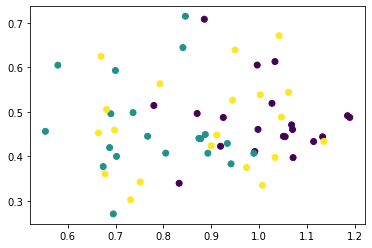

In [3]:
points_x = list(map(lambda x: x[0][0], points))
points_y = list(map(lambda x: x[0][1], points))
colors = [0] * train_cluster_size + [2] * test_cluster_size + [1] * train_cluster_size + [2] * test_cluster_size
plt.scatter(x=points_x, y=points_y, c=colors)

#синие точки надо распределить

In [4]:
# Записали тестовые точки, с которыми будем работать
real_test_points=[]
for j in range(num_clusters):
    for i in range(train_cluster_size,train_cluster_size+test_cluster_size,1):
        real_test_points.append( [ (points[i+j*(train_cluster_size+test_cluster_size)][0][0],points[i+j*(train_cluster_size+test_cluster_size)][0][1]) , points[i+j*(train_cluster_size+test_cluster_size)][1] ] )

In [5]:
def dist(x,y):
    res=0
    for i in range(len(x)):
        res+=(x[i]-y[i])**2
    return res**0.5


In [6]:
def kNN(k, points, num_clusters, train_cluster_size, test_cluster_size):
    """
    @param k: количество соседей
    @param num_clusters: число кластеров, на которое необходимо поделить
    @param points: список из пар координат точек
    @param train_cluster_size: размер класса в обучающей выборке
    @param test_cluster_size: размер класса в тестовой выборке
    
    @return: тестовые точки и их класс
    """
    # Записали тестовые точки, с которыми будем работать
    test_points=[]
    for j in range(num_clusters):
        for i in range(train_cluster_size,train_cluster_size+test_cluster_size,1):
            test_points.append( [ (points[i+j*(train_cluster_size+test_cluster_size)][0][0],points[i+j*(train_cluster_size+test_cluster_size)][0][1]) , -1 ] )
    
    for t in range(len(test_points)):
        # Массив элеметов вида (точка, расстояние до нее) (для каждой тестовой точки свой)
        distances=[]
        neighbours=[]
        for j in range(num_clusters):
            for i in range(train_cluster_size):
                distances.append( (dist(test_points[t][0], points[i+j*(train_cluster_size+test_cluster_size)][0]) , points[i+j*(train_cluster_size+test_cluster_size)]) )
        # Сортируем полученный массив по расстояням
        distances.sort()
        # Берем первые k
        neighbours=distances[:k]
        
        #идём по сосдеям
        count=0
        for neigh in neighbours:
            if neigh[1][1]==0:
                count+=1
        if num_clusters*count > k:
           test_points[t][1]=0
        else:
           test_points[t][1]=1     
    return test_points

In [7]:
#Вызов kNN
knn_test_points=kNN(k, points, num_clusters, train_cluster_size, test_cluster_size)

In [8]:
#проверка ошибок
def check(knn_test_points, real_test_points):
    err=0
    for j in range(len(knn_test_points)):
        if knn_test_points[j][1]!=real_test_points[j][1]:
            err+=1
    return err

In [9]:
check(knn_test_points, real_test_points)

2

Получили 2 ошибки на 20 точках, что кажется неплохим результатом